## Lab 5 - Gathering Data

For your final project, you'll need to find a dataset. 

Take a little time to browse this page to see what's available for your interests: https://github.com/caesar0301/awesome-public-datasets.

Similarly, check here to see what APIs are available: https://www.programmableweb.com/category/all/apis. Note that some of these APIs are Web APIs only, and required a bearer token.

When you're done, let's get some more practice connecting to an API.

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import json
import requests

# Magic!
%matplotlib inline

# Project

Spotify's API is particularly easy to use. See their documentation here: https://developer.spotify.com/web-api/endpoint-reference/

Any endpoint on the table without OAuth on the right hand side is fair game without any authentication, although you get a higher rate limit if you register with them. They don't post what their rate limit is so be careful about hitting their API too fast. How do you know if you went over? See here: https://developer.spotify.com/web-api/user-guide/#rate-limiting.

We have already learned a large part of the data science process. The below workflow is common to many data science questions.

### Identify the Problem

In [8]:
# See what data is available, and ask a SMART question
# As with most APIs, your IP address will get banned if you exceed the limit. 
# If a strict rate limit prevents you from answering your question, find a different question to ask that requires relatively few calls.

### Extract the data

In [2]:
#WARNING: use time.sleep(<seconds>) to limit the rate of your requests.

# hint: This may require two steps: 1) doing a search to find out what an artist or album's ID is
# and then 2) making a second API call to retreive that artist/album data.

# Eric Leboff ertist id = 4VudMHmo1fbh2vkHIlHoYA

def Spotify(artist, client_id, limit): 
    with requests.session() as c:
        url = 'https://api.spotify.com/v1/artists/' + artist + '/related-artists'
        query = {'limit': limit}
        headers = {'response_type': 'code' + client_id}
        time.sleep(.5)
        r = requests.get(url, headers=headers)
        print r.status_code, r.reason, ' - ', r.url
        return r

client_id_a = 'd1e4530604cb4725a088daa55e25709b'; # Your client id
#client_secret_a = '543d86be621841c0a01930b4589a10ed'; # Your secret
artist = '4VudMHmo1fbh2vkHIlHoYA'    
response = Spotify(artist, client_id_a, 50)
response.content

200 OK  -  https://api.spotify.com/v1/artists/4VudMHmo1fbh2vkHIlHoYA/related-artists


'{\n  "artists" : [ {\n    "external_urls" : {\n      "spotify" : "https://open.spotify.com/artist/1g7SzzSf5mKMo5aiS2C4z5"\n    },\n    "followers" : {\n      "href" : null,\n      "total" : 23157\n    },\n    "genres" : [ "spoken word" ],\n    "href" : "https://api.spotify.com/v1/artists/1g7SzzSf5mKMo5aiS2C4z5",\n    "id" : "1g7SzzSf5mKMo5aiS2C4z5",\n    "images" : [ {\n      "height" : 640,\n      "url" : "https://i.scdn.co/image/77fc378aeba5de005573e89d89eee60dab98e56f",\n      "width" : 640\n    }, {\n      "height" : 300,\n      "url" : "https://i.scdn.co/image/bd66b4244083ffeed82afe051e712dff7335edf0",\n      "width" : 300\n    }, {\n      "height" : 64,\n      "url" : "https://i.scdn.co/image/d66e44c1f5b648d5586144fd343893d22052ee0e",\n      "width" : 64\n    } ],\n    "name" : "Listener",\n    "popularity" : 37,\n    "type" : "artist",\n    "uri" : "spotify:artist:1g7SzzSf5mKMo5aiS2C4z5"\n  }, {\n    "external_urls" : {\n      "spotify" : "https://open.spotify.com/artist/3jmTqi

### Transform the data

In [3]:

def import_response_to_pandas(response):
    """
    For Uber API v1.2.
    This function converts a successful API response and returns a pandas dataframe.
    If the response was not successful, it returns an empty list.
    """
    response_as_dict = json.loads(response.content)
    if 'artists' in response_as_dict:
        return pd.read_json(json.dumps(response_as_dict['artists']))
    else:
        return []

initial = import_response_to_pandas(response)
initial

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 23157}",[spoken word],https://api.spotify.com/v1/artists/1g7SzzSf5mK...,1g7SzzSf5mKMo5aiS2C4z5,[{u'url': u'https://i.scdn.co/image/77fc378aeb...,Listener,37,artist,spotify:artist:1g7SzzSf5mKMo5aiS2C4z5
1,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 1}",[],https://api.spotify.com/v1/artists/3jmTqi9jgG6...,3jmTqi9jgG6PoRff9E6e72,[{u'url': u'https://i.scdn.co/image/f402124332...,Polished,0,artist,spotify:artist:3jmTqi9jgG6PoRff9E6e72
2,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 33}",[],https://api.spotify.com/v1/artists/3MWHWQjh7wa...,3MWHWQjh7wazxY1HwIHgbi,[{u'url': u'https://i.scdn.co/image/c1bb1406f4...,Frankenixon,1,artist,spotify:artist:3MWHWQjh7wazxY1HwIHgbi
3,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 45}",[],https://api.spotify.com/v1/artists/2AGOc3zVHmu...,2AGOc3zVHmuLcb97HzSiPR,[{u'url': u'https://i.scdn.co/image/5e794fdc58...,Paul Gonzenbach,3,artist,spotify:artist:2AGOc3zVHmuLcb97HzSiPR
4,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 174}",[],https://api.spotify.com/v1/artists/1xwX9mp3flS...,1xwX9mp3flSAVkaRVsb60i,[{u'url': u'https://i.scdn.co/image/899ae2a73a...,Clay Cages,2,artist,spotify:artist:1xwX9mp3flSAVkaRVsb60i
5,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 3}",[thrash-groove metal],https://api.spotify.com/v1/artists/520bvJfApXG...,520bvJfApXGWVFzTWepaV7,[{u'url': u'https://i.scdn.co/image/e6d2fea23f...,Delusions Of,0,artist,spotify:artist:520bvJfApXGWVFzTWepaV7
6,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 8}",[],https://api.spotify.com/v1/artists/7kJrVvReOeV...,7kJrVvReOeVWQrRjKOfmWN,[{u'url': u'https://i.scdn.co/image/5f27b874e8...,The Bittersweet,0,artist,spotify:artist:7kJrVvReOeVWQrRjKOfmWN
7,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 1007}",[],https://api.spotify.com/v1/artists/0vijF095JTd...,0vijF095JTdI3CpXaXuggK,[{u'url': u'https://i.scdn.co/image/aef34185e2...,Saccharine,0,artist,spotify:artist:0vijF095JTdI3CpXaXuggK
8,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 12}",[],https://api.spotify.com/v1/artists/4xiKNQB2s1g...,4xiKNQB2s1gU6VIxAeXLK1,[{u'url': u'https://i.scdn.co/image/9ba2fe186b...,The Kinetic,6,artist,spotify:artist:4xiKNQB2s1gU6VIxAeXLK1
9,{u'spotify': u'https://open.spotify.com/artist...,"{u'href': None, u'total': 74}",[],https://api.spotify.com/v1/artists/6hG7qINRXtB...,6hG7qINRXtBIDtimi2n13G,[{u'url': u'https://i.scdn.co/image/961d1a5e53...,Spiraling,2,artist,spotify:artist:6hG7qINRXtBIDtimi2n13G


### Load the data

In [4]:
df = pd.DataFrame(initial)
df[['followers', 'name', 'popularity', 'type']]

,followers,name,popularity,type
0,"{u'href': None, u'total': 23157}",Listener,37,artist
1,"{u'href': None, u'total': 1}",Polished,0,artist
2,"{u'href': None, u'total': 33}",Frankenixon,1,artist
3,"{u'href': None, u'total': 45}",Paul Gonzenbach,3,artist
4,"{u'href': None, u'total': 174}",Clay Cages,2,artist
5,"{u'href': None, u'total': 3}",Delusions Of,0,artist
6,"{u'href': None, u'total': 8}",The Bittersweet,0,artist
7,"{u'href': None, u'total': 1007}",Saccharine,0,artist
8,"{u'href': None, u'total': 12}",The Kinetic,6,artist
9,"{u'href': None, u'total': 74}",Spiraling,2,artist


In [11]:
dict_foll = dict(df['followers'])
tricky_followers = []
for key, value in dict_foll.items():
    tricky_followers.append(value['total'])
tricky_followers

[23157, 1, 33, 45, 174, 3, 8, 1007, 12, 74, 107, 0]

In [12]:
df['followers'] = tricky_followers
artists = df[['followers', 'name', 'popularity', 'type']]

### Explore and clean the data

In [4]:
# e.g., remove missing values, etc
# e.g., what is the mean, median, mode? Are there outliers? 
# Any indications the data has issues?

In [13]:
artists.describe()

,followers,popularity
count,12.000000,12.000000
mean,2051.750000,4.500000
std,6652.375476,10.396678
min,0.000000,0.000000
25%,6.750000,0.000000
50%,39.000000,1.500000
75%,123.750000,3.000000
max,23157.000000,37.000000


In [14]:
artists.median()

followers     39.0
popularity     1.5
dtype: float64

In [21]:
df = artists.drop(artists.index[[0]])
df

,followers,name,popularity,type
1,1,Polished,0,artist
2,33,Frankenixon,1,artist
3,45,Paul Gonzenbach,3,artist
4,174,Clay Cages,2,artist
5,3,Delusions Of,0,artist
6,8,The Bittersweet,0,artist
7,1007,Saccharine,0,artist
8,12,The Kinetic,6,artist
9,74,Spiraling,2,artist
10,107,Front And Center,3,artist


### Analyze the data

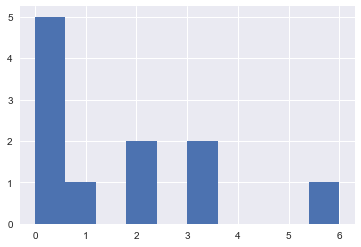

In [22]:
df['popularity'].hist()


### Visualize your Results

BONUS: Look at the documentation for https://pokeapi.co/. It gives you stats about Pokemon. It's an easy exercise because this data doesn't require authentication. Do an analysis of your choice on Pokemon.